# Episode 7 - Basic MNIST with tf.contrib.learn

## mnist问题
- 计算机视觉领域的Hello world
- 给定55000个图片，处理成28*28的二维矩阵，矩阵中每个值表示一个像素点的灰度，作为feature
- 给定每张图片对应的字符，作为label，总共有10个label，是一个多分类问题



此代码是针对TensorFlow 0.10.0rc0进行测试的。 你可以在这里找到一个docker镜像：https://hub.docker.com/r/tensorflow/tensorflow/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

下载解压mnist数据，每个img已经灰度化成长784的数组，每个label已经one-hot成长度10的数组

In [2]:
mnist = learn.datasets.load_dataset('mnist')

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


numpy读取图像到内存，用于后续操作，包括训练集（只取前10000个）和验证集

In [3]:
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

列车中有55k个例子，在eval中有10k个例子。您可能希望限制大小以更快地进行实验。

In [4]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [5]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

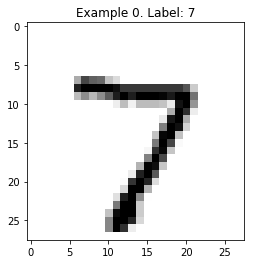

In [6]:
display(0)

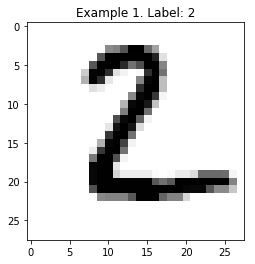

In [7]:
display(1)

These digits are clearly drawn. Here's one that's not.

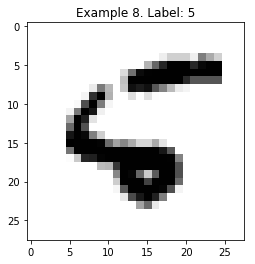

In [8]:
display(8)

Now let's take a look at how many features we have.

In [9]:
print (len(data[0]))

784


## 拟合一个线性分类器

我们这里的目标是用这个简单的分类器获得约90％的准确度。 有关这些工作的更多细节，请参阅 https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [10]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x122f96a20>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

## 评估准确性

In [11]:
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


## 分几个例子

我们可以使用预测方法对单个图像进行预测

Predicted 7, Label: 7


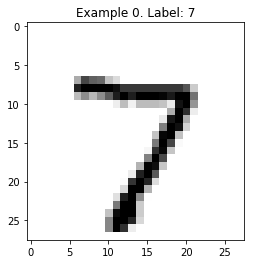

In [12]:
# here's one it gets right
prediction = classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[0]))
display(0)

Predicted 6, Label: 5


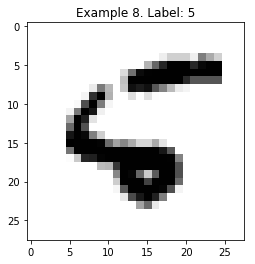

In [13]:
# and one it gets wrong
prediction = classifier.predict(np.array([test_data[8]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[8]))
display(8)

## 可视化学习权重


让我们来看看我们是否可以重现TensorFlow Basic MNSIT中权重的图片 <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

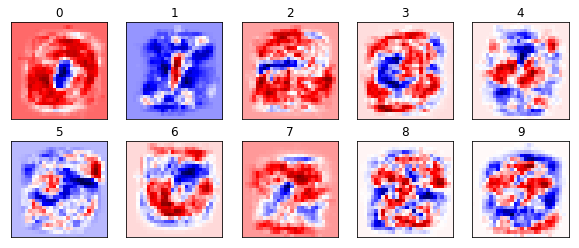

In [14]:
weights = classifier.get_variable_value("linear//weight")
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

- 这里展示了8个张图中，每个像素点（也就是feature）的weights，
- 红色表示正的权重，蓝色表示负的权重
- 作用越大的像素，它的颜色越深，也就是权重越大
- 所以权重中红色部分几乎展示了正确的数字

# 下一步

* TensorFlow Docker images: https://hub.docker.com/r/tensorflow/tensorflow/ 
* TF.Learn Quickstart: https://www.tensorflow.org/versions/r0.9/tutorials/tflearn/index.html
* MNIST tutorial: https://www.tensorflow.org/tutorials/mnist/beginners/index.html
* Visualizating MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* Additional notebooks: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/tools/docker/notebooks
* More about linear classifiers: https://www.tensorflow.org/versions/r0.10/tutorials/linear/overview.html#large-scale-linear-models-with-tensorflow
* Much more about linear classifiers: http://cs231n.github.io/linear-classify/
* Additional TF.Learn samples: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow